In [8]:
import pandas as pd

df = pd.read_csv('/Users/rohith/Documents/Datasets/Iris_dataset/iris.csv')

In [9]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            

In [10]:
df = df.drop(['Id'],axis=1)

In [11]:
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
print(s)

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']


In [12]:
rows = list(range(100,150))
df = df.drop(df.index[rows])

In [13]:
print(df)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0             5.1           3.5            1.4           0.2      Iris-setosa
1             4.9           3.0            1.4           0.2      Iris-setosa
2             4.7           3.2            1.3           0.2      Iris-setosa
3             4.6           3.1            1.5           0.2      Iris-setosa
4             5.0           3.6            1.4           0.2      Iris-setosa
5             5.4           3.9            1.7           0.4      Iris-setosa
6             4.6           3.4            1.4           0.3      Iris-setosa
7             5.0           3.4            1.5           0.2      Iris-setosa
8             4.4           2.9            1.4           0.2      Iris-setosa
9             4.9           3.1            1.5           0.1      Iris-setosa
10            5.4           3.7            1.5           0.2      Iris-setosa
11            4.8           3.4            1.6           0.2    

In [14]:
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    else:
        Y.append(1)

In [16]:
df = df.drop(['Species'],axis=1)

In [17]:
X = df.values.tolist()

In [19]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import numpy as np

X, Y = shuffle(X,Y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [73]:
print(x_test.shape)

(10, 4)


In [46]:
x_1 = x_train[:,0]
x_2 = x_train[:,1]
x_3 = x_train[:,2]
x_4 = x_train[:,3]

x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
x_4 = np.array(x_4)

x_1 = x_1.reshape(90,1)
x_2 = x_2.reshape(90,1)
x_3 = x_3.reshape(90,1)
x_4 = x_4.reshape(90,1)

In [41]:
y_train = y_train.reshape(90,1)

In [128]:
## Logistic Regression 
import numpy as np

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

theta_0 = np.zeros((90,1))
theta_1 = np.zeros((90,1))
theta_2 = np.zeros((90,1))
theta_3 = np.zeros((90,1))
theta_4 = np.zeros((90,1))


loops = 0
cost_func = []
while(loops < 10000):
    y = theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * x_3 + theta_4 * x_4
    y = sigmoid(y)
    
    cost = (- np.dot(np.transpose(y_train),np.log(y)) - np.dot(np.transpose(1-y_train),np.log(1-y)))/90
    
    theta_0_grad = np.dot(np.ones((1,90)),y-y_train)/90
    theta_1_grad = np.dot(np.transpose(x_1),y-y_train)/90
    theta_2_grad = np.dot(np.transpose(x_2),y-y_train)/90
    theta_3_grad = np.dot(np.transpose(x_3),y-y_train)/90
    theta_4_grad = np.dot(np.transpose(x_4),y-y_train)/90
    
    theta_0 = theta_0 - 0.0001 * theta_0_grad
    theta_1 = theta_1 - 0.0001 * theta_1_grad
    theta_2 = theta_2 - 0.0001 * theta_2_grad
    theta_3 = theta_3 - 0.0001 * theta_3_grad
    theta_4 = theta_4 - 0.0001 * theta_4_grad
    
    cost_func.append(cost)
    loops += 1

In [129]:
test_x_1 = x_test[:,0]
test_x_2 = x_test[:,1]
test_x_3 = x_test[:,2]
test_x_4 = x_test[:,3]

test_x_1 = np.array(test_x_1)
test_x_2 = np.array(test_x_2)
test_x_3 = np.array(test_x_3)
test_x_4 = np.array(test_x_4)

test_x_1 = test_x_1.reshape(10,1)
test_x_2 = test_x_2.reshape(10,1)
test_x_3 = test_x_3.reshape(10,1)
test_x_4 = test_x_4.reshape(10,1)

In [130]:
index = list(range(10,90))

theta_0 = np.delete(theta_0, index)
theta_1 = np.delete(theta_1, index)
theta_2 = np.delete(theta_2, index)
theta_3 = np.delete(theta_3, index)
theta_4 = np.delete(theta_4, index)

In [131]:
theta_0 = theta_0.reshape(10,1)
theta_1 = theta_1.reshape(10,1)
theta_2 = theta_2.reshape(10,1)
theta_3 = theta_3.reshape(10,1)
theta_4 = theta_4.reshape(10,1)

In [132]:
y_pred = theta_0 + theta_1 * test_x_1 + theta_2 * test_x_2 + theta_3 * test_x_3 + theta_4 * test_x_4

In [133]:
new_y_pred =[]
for val in y_pred:
    if(val >= 0.5):
        new_y_pred.append(1)
    else:
        new_y_pred.append(0)

In [134]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,new_y_pred))

1.0


In [135]:
cost_func = np.array(cost_func)
cost_func = cost_func.reshape(10000,1)

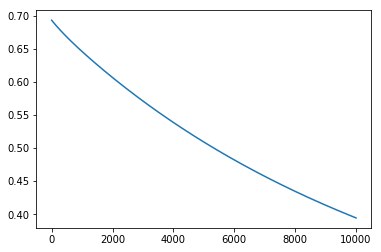

In [136]:
import matplotlib.pyplot as plt 

plt.plot(range(len(cost_func)),cost_func)